# 1. Analysis of Missing Values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
data.isnull().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [5]:
data['deck_null']=np.where(data['deck'].isnull(),1,0)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_null
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [6]:
data.groupby(['survived'])['deck_null'].mean()
# survived 값이 각각 0,1 인 집단에 대한 deck_null 값의 평균

survived
0    0.877960
1    0.602339
Name: deck_null, dtype: float64

In [7]:
data['age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: age, Length: 891, dtype: bool

In [8]:
data['age'].isnull().groupby(data['survived']).mean()
# survived 값이 각각 0,1 인 집단에 대한 data['age'].isnull() 값의 평균

survived
0    0.227687
1    0.152047
Name: age, dtype: float64

# 2. Cardinality in ML Models

### cardinality : number of possible values that one feature can assume

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [10]:
data=sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
len(data['fare'].unique())
# high cardinality

248

In [12]:
len(data['sex'].unique())
# low cardinality

2

In [13]:
data['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['C', 'E', 'G', 'D', 'A', 'B', 'F']

In [14]:
df=data[['deck','sex','survived']]
df

,deck,sex,survived
0,NaN,male,0
1,C,female,1
2,NaN,female,1
3,C,female,1
4,NaN,male,0
...,...,...,...
886,NaN,male,0
887,B,female,1
888,NaN,female,0
889,C,male,1


In [15]:
df['deck'].str[0].fillna('N').unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [16]:
df['deck_filled']=data['deck'].str[0].fillna('N')

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df

,deck,sex,survived,deck_filled
0,NaN,male,0,N
1,C,female,1,C
2,NaN,female,1,N
3,C,female,1,C
4,NaN,male,0,N
...,...,...,...,...
886,NaN,male,0,N
887,B,female,1,B
888,NaN,female,0,N
889,C,male,1,C


In [18]:
use_cols=['deck_filled','sex']
x_train,x_test,y_train,y_test=train_test_split(df[use_cols],data['survived'],test_size=0.2,random_state=0)

In [19]:
x_train.shape, y_train.shape, x_test.shape

((712, 2), (712,), (179, 2))

### categorical encoding

In [20]:
x_train.head()

,deck_filled,sex
140,N,female
439,N,male
817,N,male
378,N,male
491,N,male


In [21]:
train=pd.get_dummies(x_train)
test=pd.get_dummies(x_test)

In [22]:
train.head()

,deck_filled_A,deck_filled_B,deck_filled_C,deck_filled_D,deck_filled_E,deck_filled_F,deck_filled_G,deck_filled_N,sex_female,sex_male
140,0,0,0,0,0,0,0,1,1,0
439,0,0,0,0,0,0,0,1,0,1
817,0,0,0,0,0,0,0,1,0,1
378,0,0,0,0,0,0,0,1,0,1
491,0,0,0,0,0,0,0,1,0,1


In [23]:
test.head()

,deck_filled_B,deck_filled_C,deck_filled_D,deck_filled_E,deck_filled_F,deck_filled_G,deck_filled_N,sex_female,sex_male
495,0,0,0,0,0,0,1,0,1
648,0,0,0,0,0,0,1,0,1
278,0,0,0,0,0,0,1,0,1
31,1,0,0,0,0,0,0,1,0
255,0,0,0,0,0,0,1,1,0


In [24]:
train.shape, test.shape, y_train.shape, y_test.shape

((712, 10), (179, 9), (712,), (179,))

In [25]:
missing_cols=set(train.columns)-set(test.columns)

In [26]:
missing_cols

{'deck_filled_A'}

In [27]:
for c in missing_cols:
    test[c]=0

In [28]:
train.shape, test.shape, y_train.shape, y_test.shape

((712, 10), (179, 10), (712,), (179,))

In [29]:
clf=RandomForestClassifier(n_estimators=200,random_state=42)
clf.fit(train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [30]:
y_train_pred=clf.predict_proba(train)
y_test_pred=clf.predict_proba(test)

In [31]:
y_train_pred

array([[0.34082183, 0.65917817],
       [0.85360493, 0.14639507],
       [0.85360493, 0.14639507],
       ...,
       [0.85360493, 0.14639507],
       [0.34082183, 0.65917817],
       [0.85360493, 0.14639507]])

In [32]:
y_test_pred

array([[0.28907763, 0.71092237],
       [0.28907763, 0.71092237],
       [0.28907763, 0.71092237],
       [0.53211966, 0.46788034],
       [0.60392832, 0.39607168],
       [0.        , 1.        ],
       [0.5177151 , 0.4822849 ],
       [0.5177151 , 0.4822849 ],
       [0.06016313, 0.93983687],
       [0.60392832, 0.39607168],
       [0.28907763, 0.71092237],
       [0.60392832, 0.39607168],
       [0.28907763, 0.71092237],
       [0.60392832, 0.39607168],
       [0.5177151 , 0.4822849 ],
       [0.60392832, 0.39607168],
       [0.28907763, 0.71092237],
       [0.28907763, 0.71092237],
       [0.28907763, 0.71092237],
       [0.28907763, 0.71092237],
       [0.28907763, 0.71092237],
       [0.60392832, 0.39607168],
       [0.28907763, 0.71092237],
       [0.28907763, 0.71092237],
       [0.60392832, 0.39607168],
       [0.49672766, 0.50327234],
       [0.28907763, 0.71092237],
       [0.60392832, 0.39607168],
       [0.60392832, 0.39607168],
       [0.60392832, 0.39607168],
       [0.

In [33]:
y_train_pred[:,1]

array([0.65917817, 0.14639507, 0.14639507, 0.14639507, 0.14639507,
       0.29101955, 0.14639507, 0.65917817, 0.14639507, 0.14639507,
       0.65917817, 0.65917817, 0.28840359, 0.65917817, 0.65917817,
       0.14639507, 0.28840359, 0.14639507, 0.65917817, 0.14639507,
       0.14639507, 0.14639507, 0.65917817, 0.14639507, 0.65917817,
       0.14639507, 0.14639507, 0.65917817, 0.14639507, 0.65917817,
       0.14639507, 0.14639507, 0.4283835 , 0.14639507, 0.65917817,
       0.14639507, 0.14639507, 0.14639507, 0.14639507, 0.65917817,
       0.65917817, 0.14639507, 1.        , 0.71092237, 0.14639507,
       0.65917817, 0.14639507, 0.14639507, 0.65917817, 0.14639507,
       0.14639507, 0.14639507, 0.65917817, 0.65917817, 0.65917817,
       0.14639507, 0.14639507, 0.65917817, 0.65917817, 0.65917817,
       0.14639507, 0.14639507, 1.        , 0.14639507, 0.14639507,
       0.93181424, 0.14639507, 0.65917817, 0.14639507, 0.14639507,
       0.93181424, 0.14639507, 0.14639507, 0.29101955, 0.14639

In [34]:
roc_auc_score(y_train,y_train_pred[:,1])

0.8157317246155514

In [35]:
roc_auc_score(y_test,y_test_pred[:,1])

0.3040843214756258

In [36]:
def run_models(data_train,data_test,y_train,y_test):
    rf=RandomForestClassifier(n_estimators=200,random_state=42)
    ada=AdaBoostClassifier(n_estimators=200,random_state=42)
    logit=LogisticRegression(solver='lbfgs',random_state=42)
    gbc=GradientBoostingClassifier(n_estimators=200,random_state=42)
    
    models={
        'Random Forest':rf,'AdaBoost':ada,'Logistic Reg':logit,'GradientBoost':gbc
           }
    
    train=pd.get_dummies(data_train,columns=data_train.columns)
    test=pd.get_dummies(data_test,columns=data_test.columns)
    missing_cols=set(train.columns)-set(test.columns)
    for c in missing_cols:
        test[c]=0
    test=test[train.columns]
    for label, clf in models.items():
        clf.fit(train,y_train)
        y_train_pred=clf.predict_proba(train)
        y_test_pred=clf.predict_proba(test)
        
        print(label,roc_auc_score(y_train,y_train_pred[:,1]))
        print(label,roc_auc_score(y_test,y_test_pred[:,1]))
        print()

In [37]:
run_models(train,test,y_train,y_test)

Random Forest 0.8157317246155514
Random Forest 0.8534914361001318

AdaBoost 0.8148889834539037
AdaBoost 0.8577075098814229

Logistic Reg 0.8149891111166737
Logistic Reg 0.8545454545454545

GradientBoost 0.8157317246155514
GradientBoost 0.8534914361001318



# 3. Handling Rare Occuring Labels

In [102]:
cols=['Neighborhood','Exterior1st','Exterior2nd','SalePrice']
data=pd.read_csv('data/houseprice.csv',usecols=cols)
data

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000
...,...,...,...,...
1455,Gilbert,VinylSd,VinylSd,175000
1456,NWAmes,Plywood,Plywood,210000
1457,Crawfor,CemntBd,CmentBd,266500
1458,NAmes,MetalSd,MetalSd,142125


In [103]:
feature_cols=['Neighborhood','Exterior1st','Exterior2nd']
for col in feature_cols:
    print(data[col].nunique())
    print(data[col].value_counts())
    print()

25
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

15
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

16
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64



In [104]:
data.isnull().sum()

Neighborhood    0
Exterior1st     0
Exterior2nd     0
SalePrice       0
dtype: int64

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  1460 non-null   object
 1   Exterior1st   1460 non-null   object
 2   Exterior2nd   1460 non-null   object
 3   SalePrice     1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


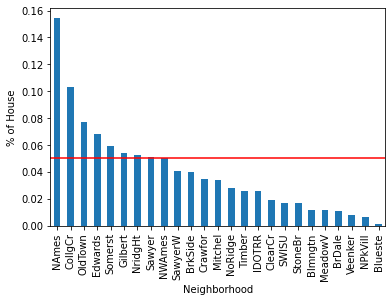

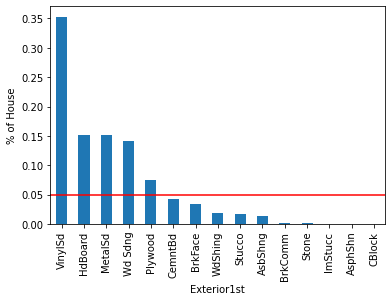

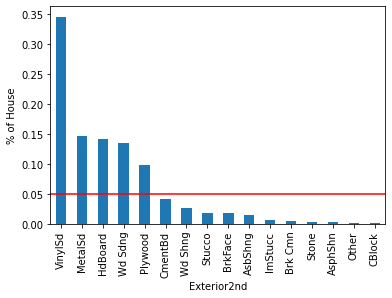

In [106]:
for col in feature_cols:
    temp=data[col].value_counts()/data.shape[0]
    temp.plot.bar()
    plt.axhline(y=0.05,color='red')
    plt.xlabel(col)
    plt.ylabel('% of House')
    plt.show()

In [59]:
temp

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: Exterior2nd, dtype: float64

In [61]:
temp.reset_index()

,index,Exterior2nd
0,VinylSd,0.345205
1,MetalSd,0.146575
2,HdBoard,0.141781
3,Wd Sdng,0.134932
4,Plywood,0.097260
5,CmentBd,0.041096
6,Wd Shng,0.026027
7,Stucco,0.017808
8,BrkFace,0.017123
9,AsbShng,0.013699


In [65]:
data[data['Exterior2nd']=='VinylSd']

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
2,CollgCr,VinylSd,VinylSd,223500
4,NoRidge,VinylSd,VinylSd,250000
5,Mitchel,VinylSd,VinylSd,143000
6,Somerst,VinylSd,VinylSd,307000
...,...,...,...,...
1450,NAmes,VinylSd,VinylSd,136000
1452,Edwards,VinylSd,VinylSd,145000
1453,Mitchel,VinylSd,VinylSd,84500
1454,Somerst,VinylSd,VinylSd,185000


In [70]:
data[data['Exterior2nd']=='VinylSd'].mean()

SalePrice    214432.460317
dtype: float64

In [74]:
data.groupby(['Exterior2nd'])['SalePrice'].mean()

Exterior2nd
AsbShng    114060.550000
AsphShn    138000.000000
Brk Cmn    126714.285714
BrkFace    195818.000000
CBlock     105000.000000
CmentBd    230093.833333
HdBoard    167661.565217
ImStucc    252070.000000
MetalSd    149803.172897
Other      319000.000000
Plywood    168112.387324
Stone      158224.800000
Stucco     155905.153846
VinylSd    214432.460317
Wd Sdng    148386.065990
Wd Shng    161328.947368
Name: SalePrice, dtype: float64

In [78]:
def get_mean_salesprice_per_categories(df,cat):
    temp=data[col].value_counts()/data.shape[0]
    temp=temp.reset_index()
    temp.columns=[cat,'% of house']
    
    mean_price=df.groupby([cat])['SalePrice'].mean().reset_index()
    temp=temp.merge(mean_price,on=cat,how='left')
    return temp

In [92]:
get_mean_salesprice_per_categories(data,'Exterior2nd')

,Exterior2nd,% of house,SalePrice
0,VinylSd,0.345205,214432.460317
1,MetalSd,0.146575,149803.172897
2,HdBoard,0.141781,167661.565217
3,Wd Sdng,0.134932,148386.065990
4,Plywood,0.097260,168112.387324
5,CmentBd,0.041096,230093.833333
6,Wd Shng,0.026027,161328.947368
7,Stucco,0.017808,155905.153846
8,BrkFace,0.017123,195818.000000
9,AsbShng,0.013699,114060.550000


In [85]:
temp

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: Exterior2nd, dtype: float64

In [89]:
def plot_cats(df,cat):
    fig,ax1=plt.subplots()
    plt.xticks(df.index,df[cat],rotation=90)
    
    ax2=ax1.twinx()
    ax1.bar(df.index,df['% of house'],color='lightgrey')
    ax2.plot(df.index,df['SalePrice'],color='green',label='House Price')
    ax1.axhline(y=0.05,color='red')
    
    ax1.set_ylabel('% of house per category')
    ax1.set_xlabel(cat)
    ax2.set_ylabel('Mean House Price per category')
    plt.show()

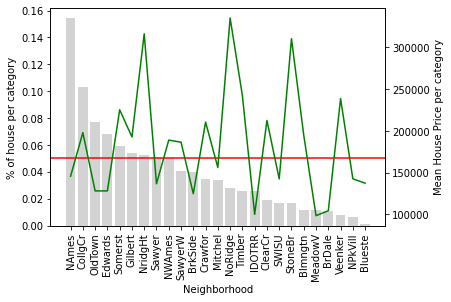

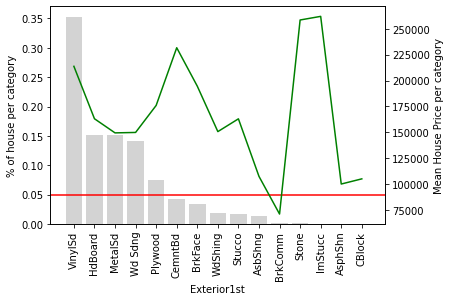

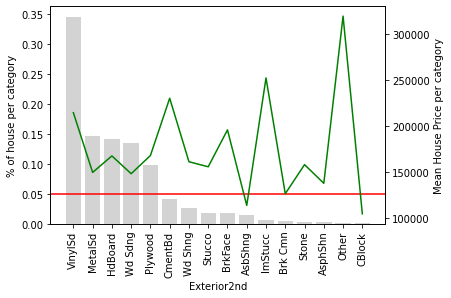

In [93]:
for col in feature_cols:
    temp=get_mean_salesprice_per_categories(data,col)
    plot_cats(temp,col)

### grouping of rare labels

In [100]:
def rare_labels_grouping(df,cat):
    temp=df[cat].value_counts()/data.shape[0]
    grouping_dict={
       k: 'rare' if k not in temp[temp>0.05].index else k  for k in temp.index
    }
    t=df[cat].map(grouping_dict)
    return t

In [101]:
rare_labels_grouping(data,'Exterior2nd').value_counts()

Series([], Name: Exterior2nd, dtype: int64)

In [107]:
data['Neighborhood']=rare_labels_grouping(data,'Neighborhood')
data['Exterior1st']=rare_labels_grouping(data,'Exterior1st')
data['Exterior2nd']=rare_labels_grouping(data,'Exterior2nd')
data

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,rare,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,rare,Wd Sdng,rare,140000
4,rare,VinylSd,VinylSd,250000
...,...,...,...,...
1455,Gilbert,VinylSd,VinylSd,175000
1456,rare,Plywood,Plywood,210000
1457,rare,rare,rare,266500
1458,NAmes,MetalSd,MetalSd,142125


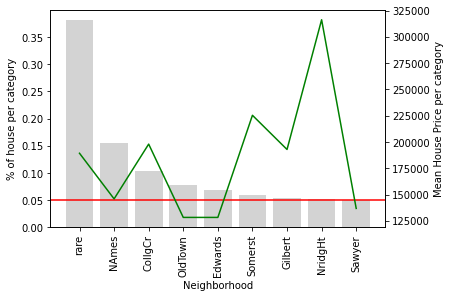

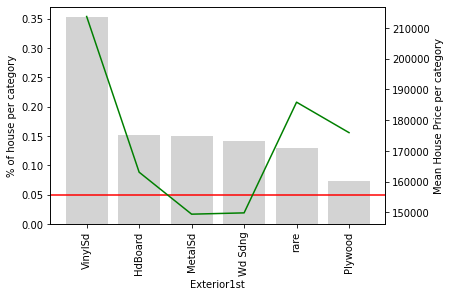

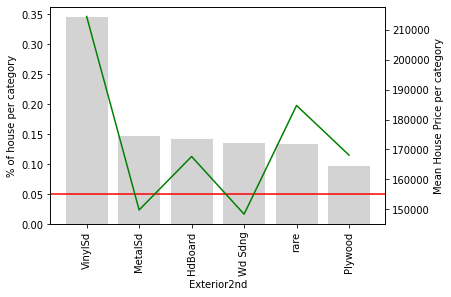

In [108]:
for col in feature_cols:
    temp=get_mean_salesprice_per_categories(data,col)
    plot_cats(temp,col)